# Automated market makers

Protocols like Uniswap and Balancer enable decentralized swaping between different tokens. This notebook gives an introduction to how AMMs work under the hood.

## Background
 
In traditional finance and centraliced exchanges an [order book](https://corporatefinanceinstitute.com/resources/knowledge/trading-investing/order-book/) it typically used to match sellers and buyers of assets.

A goal in crypto community has been to move a way from centralized finance. This led to the implementations of decentralized exchanges as smart contracts on chain. 
[Vitaliks dex post](https://www.reddit.com/r/ethereum/comments/55m04x/lets_run_onchain_decentralized_exchanges_the_way/?utm_source=share&utm_medium=web2x&context=3)

These come in various forms:
* Order books - [dydx](https://phemex.com/academy/what-is-dydx)
* Amms - [1inch](https://blog.1inch.io/1inch-revolutionizes-automated-market-maker-amm-segment-with-mooniswap-e068c20d94c)

## What are AMMs

A AMM is a contract that holds tokens provided by liquidity providers and allows traders to swap between these tokens for a fee.

An AMM is a contract that implement some type of function called a [bonding curve](https://yos.io/2018/11/10/bonding-curves/) to swap between two or more tokens.

A AMM has the following caracteristics:
* Spot price - the price to swap between tokens if you swap infinate small amounts
* Fee - a percentage of the trade that goes to liquidity providers
* Liquidity - amount of tokens available to trade
* Bonding curve - how the spoot price changes when the ratio between tokens change
* Slippage - the difference between the spot price and the price your trade gets
* Impermanent loss - a risk that liquidity providers are exposed to if tokens loose value?

Typically a AMM can be thought as a function `f` that swaps between types of tokens.
```
Amount_USD = f(Amount_ETH)
```

The function bonding curve can look in many different ways. One thing that different protocols try to differentiate between each other with is this function.
* Curve has a function optimized for low slippage
* UniswapV3 has a function that maximises liquidity while minimizing impermanent loss

The typical equation for a AMM looks like this:

```
x*y=k
```

Interactive visualization for changing curves by uniswap: 
* [v2](https://www.desmos.com/calculator/j8eppi5vvu)
* [v3](https://www.desmos.com/calculator/q2kxfue441)


In [1]:
from Arbie.address import dummy_token_generator
from Arbie.Variables.pool import Pool
from Arbie.Variables import Token

In [2]:
size = 1

# Setup tokens
dai = dummy_token_generator("Dai",1)
eth = dummy_token_generator("Dai",4000)

pool1 = Pool([dai, eth],[4000*size, 1*size],[0.5, 0.5], fee=0.003)
print(pool1.spot_price(dai, eth))

4000.0


In [3]:
from sympy import *
from sympy.plotting import plot
init_printing()

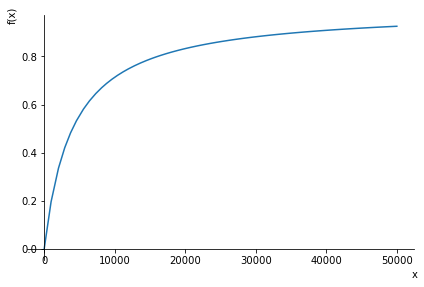

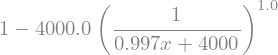

In [4]:
# We can plot our return function
x = symbols('x')
expr = pool1.out_given_in_expr(dai, eth)
plot(expr, (x, 0, 50000))
expr

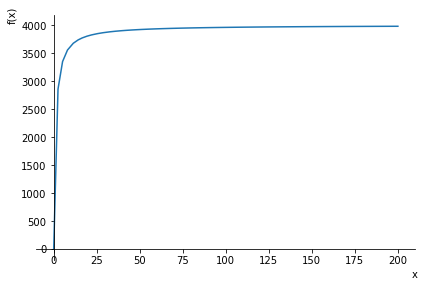

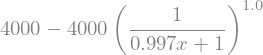

In [5]:
expr = pool1.out_given_in_expr(eth, dai)
plot(expr, (x, 0, 200))
expr